In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

In [2]:
all_files = glob.glob("../roll_data/*-strikes.csv")

df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string"}) for f in all_files), ignore_index=True)

# select season (zero indexed)
# seasons = [11,12,13,14]
# season = 13
# df = df[df['season'] == season]


# flinch_data = True

In [3]:
coverage = np.zeros((120, 4))
minevent = np.zeros((120, 4))
maxevent = np.zeros((120, 4))
print(coverage.shape)
for df_season in df.groupby("season"):
    j = df_season[0]-11
    for df_day in df_season[1].groupby("day"):
        i = df_day[0]
        coverage[i, j] = df_day[1].size
        minevent[i, j] = df_day[1]["play_count"].min()
        maxevent[i, j] = df_day[1]["play_count"].max()

(120, 4)


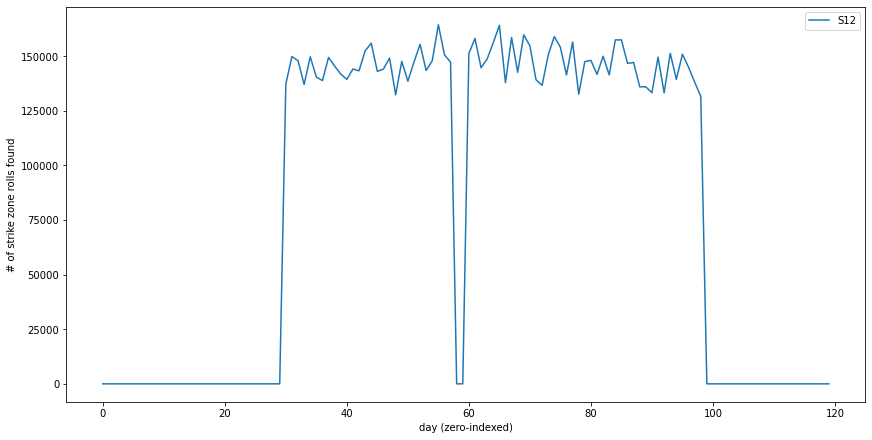

In [4]:
x = np.arange(120)
fig, ax = plt.subplots(1, figsize=(12,6), layout="constrained")
ax.plot(x, coverage[:,0], label="S12")
# ax.plot(x, coverage[:,1], label="S13")
# ax.plot(x, coverage[:,2], label="S14")
# ax.plot(x, coverage[:,3], label="S15")
ax.set_xlabel("day (zero-indexed)")
ax.set_ylabel("# of strike zone rolls found")
ax.legend()
# ax.set_xlim(90,100)

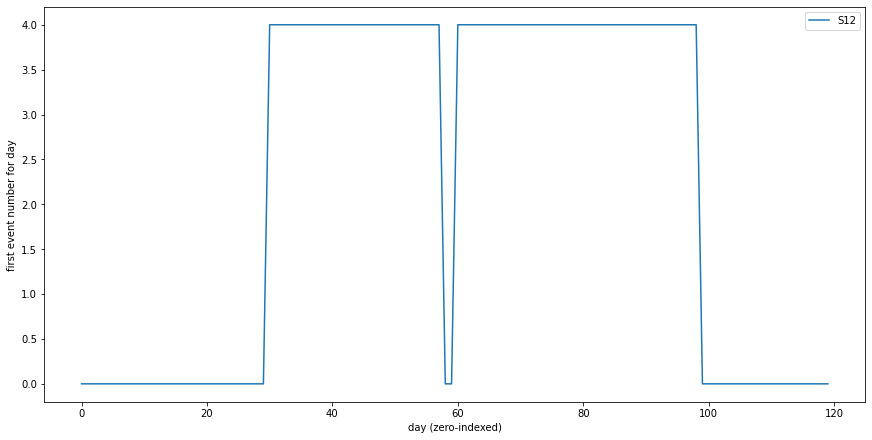

In [5]:
x = np.arange(120)
fig, ax = plt.subplots(1, figsize=(12,6), layout="constrained")
ax.plot(x, minevent[:,0], label="S12")
# ax.plot(x, minevent[:,1], label="S13")
# ax.plot(x, minevent[:,2], label="S14")
# ax.plot(x, minevent[:,3], label="S15")
ax.set_xlabel("day (zero-indexed)")
ax.set_ylabel("first event number for day")
ax.legend()
# ax.set_yscale("log")

In [6]:
for i, n in enumerate(coverage[:,0]):
    if n == 0:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
58
59
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
